### Import the necessary Python libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("NGN=X.csv")
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-11-02  438.019989  438.369995  438.019989  438.019989  438.019989   
1  2022-11-03  438.369995  438.670013  438.369995  438.369995  438.369995   
2  2022-11-04  438.670013  438.880005  438.670013  438.670013  438.670013   
3  2022-11-07  438.880005  442.000000  438.880005  438.880005  438.880005   
4  2022-11-08  439.260010  442.000000  439.260010  439.260010  439.260010   

   Volume  
0       0  
1       0  
2       0  
3       0  
4       0  


#### Plot the trend in Closing Rates

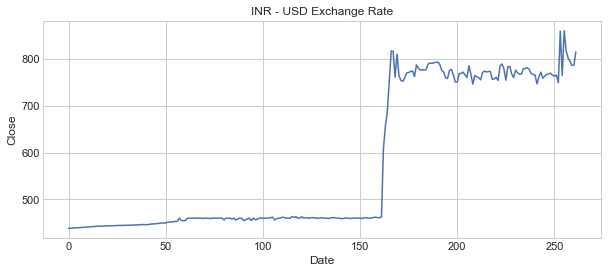

In [2]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

#### Check the correlation between the features

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.995256  0.999301  0.997607   0.997607     NaN
High       0.995256  1.000000  0.995120  0.995932   0.995932     NaN
Low        0.999301  0.995120  1.000000  0.997371   0.997371     NaN
Close      0.997607  0.995932  0.997371  1.000000   1.000000     NaN
Adj Close  0.997607  0.995932  0.997371  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


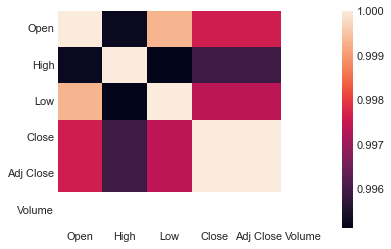

In [3]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

#### Create matrix of features x and dependent variable vector Y

In [4]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

#### Split the data and fit a Decision Tree Regression Model

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

#### Use the test set to make predictions

In [6]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0      770.000000
1      773.000000
2      759.929993
3      760.000000
4      460.514999
